In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\sonal\\Downloads\\advertising.csv")
df.info()
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


<Axes: >

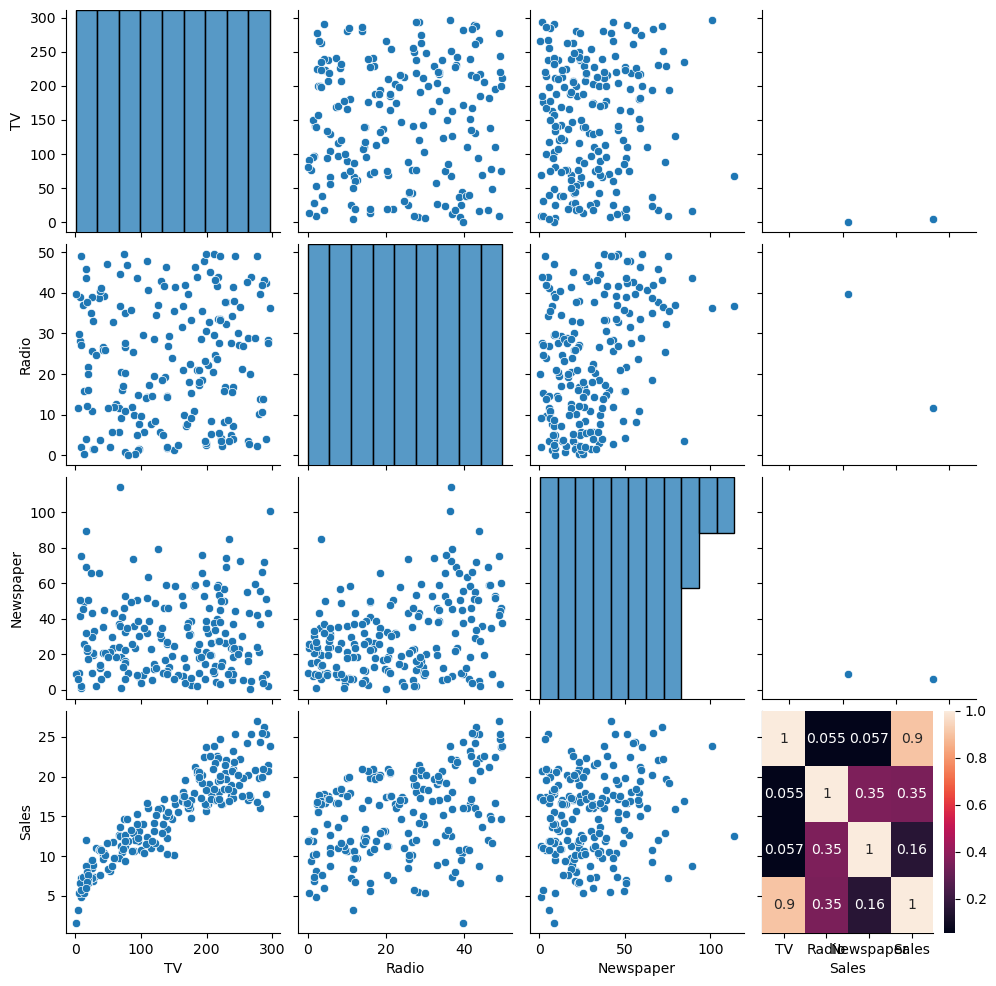

In [3]:
import seaborn as sns; sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)


In [5]:
X = df[['TV']]


In [7]:
X = df[['TV', 'Radio', 'Newspaper']]


In [9]:
y = df['Sales']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
print("R² on test:", model.score(X_test, y_test))


R² on test: 0.9032402609859365


In [17]:
print(model.coef_, model.intercept_)


[0.05239302 0.10752238 0.0004338 ] 4.912326442078987


In [19]:
y_pred = model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()


,Actual,Predicted
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


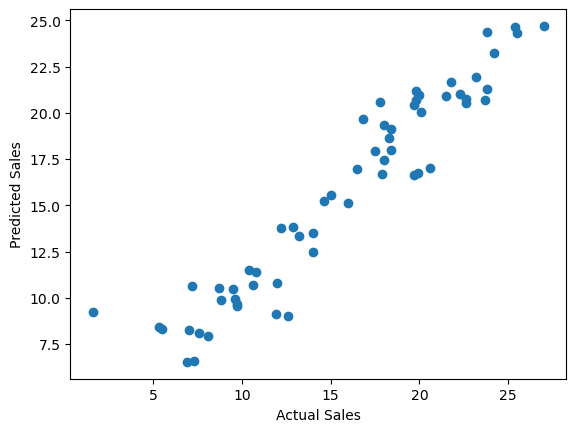

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [23]:
import pickle
pickle.dump(model, open('sales_model.pkl', 'wb'))
